## Ising Spin Chain

$\displaystyle H = J\sum_n^{N-1} \sigma_x(n) \sigma_x(n+1)$



In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

In [2]:
def integrate(N, J, psi0, tlist, gamma):
    
    si = qeye(2)
    sx = sigmax()
    sz = sigmaz()
    
    si_list = []
    sx_list = []
    sz_list = []
    
    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)
        
        si_list.append(tensor(op_list))
        
        op_list[n] = sx
        sx_list.append(tensor(op_list))
        
        op_list[n] = sz
        sz_list.append(tensor(op_list))
        
    #Construct the hamiltonian
    H = 0
    
    #Energy splitting terms
    #for n in range(N):
    #    H += -.5 * h[n] * sz_list[n]
        
    #Interaction terms
    for n in range(N-1):
        H += -.5 * J * sx_list[n] * sx_list[n+1]
        
    #Collapse operators
    c_op_list = []
    
    #Spin Amplitude damping
    if gamma > 0:
        #c_op_list.append(si_list[n])
        #c_op_list.append(np.sqrt(gamma) * sz_list[n])
        for m in range(N):
            c_op_list.append(np.sqrt(0.1) * 1/2*(si_list[m] + sz_list[m]))
    
    #Dephasing at the boundary
    c_op_list.append(np.sqrt(0.1) *  sz_list[0])
    c_op_list.append(np.sqrt(0.1) * sz_list[N-1])
    
    #Evolve and calculate expectation values
    result = mcsolve(H, psi0, tlist, c_op_list, sz_list, ntraj = 500)
    
    return result.expect

In [3]:
#Set up the calculation

N = 5          #number of spins

J = 0.1

#decay rate
gamma = 0.1

#initial state(first spin in |1> and rest in |0>)
psi_list = []
psi_list.append(basis(2,1))
for n in range(N-1):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 50, 200)

In [4]:
sz_exp = integrate(N, J, psi0, tlist, gamma)

10.0%. Run time:   0.52s. Est. time left: 00:00:00:04
20.0%. Run time:   0.95s. Est. time left: 00:00:00:03
30.0%. Run time:   1.37s. Est. time left: 00:00:00:03
40.0%. Run time:   1.77s. Est. time left: 00:00:00:02
50.0%. Run time:   2.19s. Est. time left: 00:00:00:02
60.0%. Run time:   2.63s. Est. time left: 00:00:00:01
70.0%. Run time:   3.06s. Est. time left: 00:00:00:01
80.0%. Run time:   3.46s. Est. time left: 00:00:00:00
90.0%. Run time:   3.95s. Est. time left: 00:00:00:00
100.0%. Run time:   4.48s. Est. time left: 00:00:00:00
Total run time:   4.59s


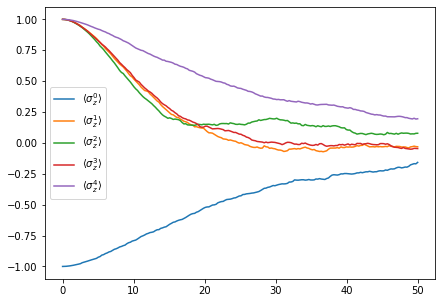

In [6]:
fig = plt.figure(figsize=(7, 5))

for n in range(N):
    plt.plot(tlist, sz_exp[n], label = r'$\langle\sigma_z^{%d}\rangle$'%n)    

plt.legend()
plt.show()